<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
# !wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

In [3]:
import os

file = 'loan_train.csv'
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'

if os.path.isfile(file):
    print('File {} exists'.format(file))
    print('Go on further')
else:
    try:
        import wget
        print('wget has been imported')
    except Exception as e:
        print('Installing wget for Python 3...')
        os.system('pip install python3-wget')
        print('wget has been installed')
        import wget
        print('wget has been imported')
    finally:
        print('Donwloading {}...'.format(file))
        file_tmp = wget.download(url, out = file)
        print('Done')

File loan_train.csv exists
Go on further


In [4]:
import random
random.seed(42)

### Load Data From CSV File


In [5]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
df.shape

(346, 10)

### Convert to date time object


In [7]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [9]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

C:\Users\a_klebeko\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


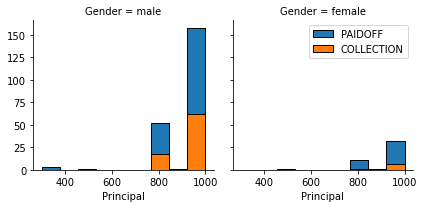

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
# g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

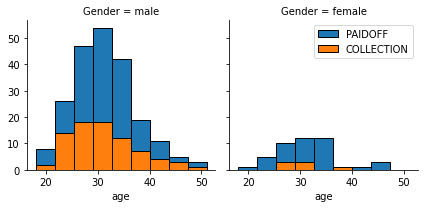

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
# g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


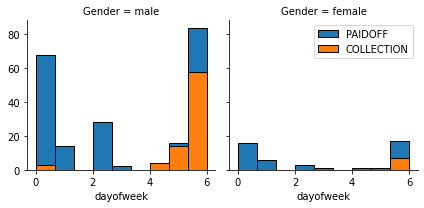

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
# g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [18]:
Feature = df[['Principal','terms','age','Gender', 'dayofweek', 'weekend', 'loan_status']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
Feature['paid'] = Feature['loan_status'].replace(to_replace = ['PAIDOFF', 'COLLECTION'], value = [1, 0])
Feature.drop(['Master or Above', 'loan_status'], axis = 1, inplace=True)
Feature.columns = ['principal', 'terms', 'age', 'gender', 'dayofweek', 'weekend', 'bechalor', 'school', 'college', 'paid']
Feature.head()

,principal,terms,age,gender,dayofweek,weekend,bechalor,school,college,paid
0,1000,30,45,0,3,0,0,1,0,1
1,1000,30,33,1,3,0,1,0,0,1
2,1000,15,27,0,3,0,0,0,1,1
3,1000,30,28,1,4,1,0,0,1,1
4,1000,30,29,0,4,1,0,0,1,1


In [19]:
Feature.groupby(['weekend'])['paid'].value_counts(normalize = True)

weekend  paid
0        1       0.978723
         0       0.021277
1        1       0.595122
         0       0.404878
Name: paid, dtype: float64

In [20]:
Feature.groupby(['dayofweek'])['paid'].value_counts(normalize = True)

dayofweek  paid
0          1       0.965517
           0       0.034483
1          1       1.000000
2          1       1.000000
3          1       1.000000
4          0       0.500000
           1       0.500000
5          1       0.548387
           0       0.451613
6          1       0.608434
           0       0.391566
Name: paid, dtype: float64

In [21]:
Feature.groupby(['terms'])['paid'].value_counts(normalize = True)

terms  paid
7      1       1.000000
15     1       0.770270
       0       0.229730
30     1       0.717391
       0       0.282609
Name: paid, dtype: float64

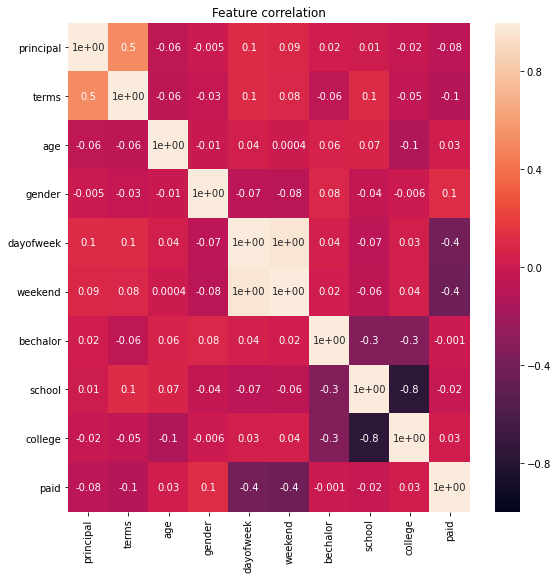

In [22]:
plt.figure(figsize = (len(Feature.columns) - 1, len(Feature.columns) - 1))
sns.heatmap(Feature.corr(), annot = True, fmt = '.1', vmin = -1.0, vmax = 1.0)
plt.title('Feature correlation')
plt.show()

### Feature Selection


Let's define feature sets, X:


In [23]:
features = [
    'principal',
    'terms',
    'age',
    'gender',
#     'dayofweek', # dropped because of the high correlcation with 'college'
    'weekend',   # has the highest correlation with the target
    'bechalor', 
    'college',
#     'school' # dropped because of the high correlcation with 'college'
]

In [24]:
X = Feature[features]
X[0:5]

,principal,terms,age,gender,weekend,bechalor,college
0,1000,30,45,0,0,0,0
1,1000,30,33,1,0,1,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,1,0,1
4,1000,30,29,0,1,0,1


What are our lables?


In [25]:
targe = 'paid'
y = Feature[targe].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [26]:
X = Feature[features]
scaler = preprocessing.StandardScaler().fit(X) # looks like the best scaler for this dataset
# scaler = preprocessing.MinMaxScaler().fit(X)
# scaler = preprocessing.Normalizer().fit(X)
# scaler = preprocessing.QuantileTransformer(n_quantiles = len(X)).fit(X)
X = scaler.transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


## Train-Test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train obs.: {}\nTest obs.{}'.format(len(y_train), len(y_test)))

Train obs.: 276
Test obs.70


## Additional actions

In [29]:
from sklearn.model_selection import GridSearchCV # will be used is algs' parameters selection
from sklearn.metrics import jaccard_score, confusion_matrix, classification_report, log_loss, accuracy_score # will be used in evaluation

In [30]:
def cmatrix_viz(cm, title = 'Confusion Matrix', classes = ['Paid=1', 'Paid=0']):
    """
    Confusion matrix visualization
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

def visualize_tree(dt_clf):
    """
    Decision Tree visualization
    """
    dot_data = StringIO()
    filename = "dt_path.png"
    featureNames = features
    out = tree.export_graphviz(
        dt_clf,
        feature_names = featureNames,
        out_file = dot_data,
        class_names = np.unique(y_train.astype('str')),
        filled = True,
        special_characters = True,
        rotate = False
    )  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img,interpolation='nearest')

# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
k_max = 10

mean_acc = np.zeros(k_max)
std_acc = np.zeros(k_max)

for k in range(1, k_max + 1):
    knn_clf = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    yhat = knn_clf.predict(X_test)
    mean_acc[k - 1] = accuracy_score(y_test, yhat)
    std_acc[k - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
    print('n = {}\tMean acc: {}\tStd: {}'.format(k, mean_acc[k - 1], std_acc[k - 1]))
    
print('k = {} has the best accuracy ({})'.format(mean_acc.argmax() + 1, mean_acc.max()))

n = 1	Mean acc: 0.7714285714285715	Std: 0.05018914660878171
n = 2	Mean acc: 0.6142857142857143	Std: 0.058179374783042935
n = 3	Mean acc: 0.8	Std: 0.047809144373375745
n = 4	Mean acc: 0.6857142857142857	Std: 0.05548618928315568
n = 5	Mean acc: 0.7285714285714285	Std: 0.05315141471586034
n = 6	Mean acc: 0.6714285714285714	Std: 0.056139144084518006
n = 7	Mean acc: 0.7714285714285715	Std: 0.05018914660878171
n = 8	Mean acc: 0.6857142857142857	Std: 0.05548618928315568
n = 9	Mean acc: 0.7142857142857143	Std: 0.05399492471560388
n = 10	Mean acc: 0.7	Std: 0.05477225575051661
k = 3 has the best accuracy (0.8)


In [34]:
params = [
    {
        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'weights': ['uniform', 'distance'],
        'leaf_size': [15, 30, 45, 60]
    }
]

knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid = params, scoring = 'jaccard', cv = 50).fit(X_train, y_train)
knn_gs.best_params_

{'leaf_size': 30, 'n_neighbors': 9, 'weights': 'uniform'}

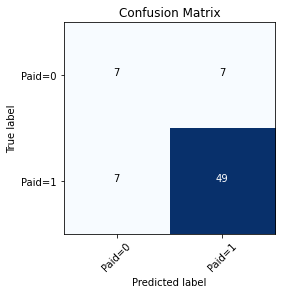

Accuracy: 0.8
Jaccard Score: 0.78
F1-Score: 0.8


		*** Classification Report ***
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        14
           1       0.88      0.88      0.88        56

    accuracy                           0.80        70
   macro avg       0.69      0.69      0.69        70
weighted avg       0.80      0.80      0.80        70



In [35]:
# Train, Score, Evaluate
# n_neighbors = knn_gs.best_params_['n_neighbors']
leaf_size = knn_gs.best_params_['leaf_size']
weights = knn_gs.best_params_['weights']
n_neighbors = 3
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors, leaf_size = leaf_size, weights = weights).fit(X_train, y_train)
yhat = knn_clf.predict(X_test)

# Evaluation
knn_accuracy = accuracy_score(y_test, yhat)
knn_j_score = jaccard_score(y_test, yhat)
knn_clf_report = classification_report(y_test, yhat, output_dict = True)
cmatrix = confusion_matrix(y_test, yhat, labels = [0, 1])

# Visualization
cmatrix_viz(cmatrix, title = 'Confusion Matrix', classes = ['Paid=0', 'Paid=1'])
plt.show()

print('Accuracy: {:.2}'.format(knn_accuracy))
print('Jaccard Score: {:.2}'.format(knn_j_score))
print('F1-Score: {:.2}'.format(knn_clf_report['weighted avg']['f1-score']))
print()
print('\n\t\t*** Classification Report ***')
print(classification_report(y_test, yhat))

# Decision Tree


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
depth_max = 20

for depth in range(4, depth_max + 1):
    dt_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = depth).fit(X_train, y_train)
    yhat = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    j_score = jaccard_score(y_test, yhat)
    print('Accuracy = {:.3} Jaccard Score: {:.3} with max_depth = {}'.format(accuracy, j_score, depth))

Accuracy = 0.7 Jaccard Score: 0.682 with max_depth = 4
Accuracy = 0.657 Jaccard Score: 0.647 with max_depth = 5
Accuracy = 0.657 Jaccard Score: 0.613 with max_depth = 6
Accuracy = 0.686 Jaccard Score: 0.672 with max_depth = 7
Accuracy = 0.671 Jaccard Score: 0.652 with max_depth = 8
Accuracy = 0.643 Jaccard Score: 0.615 with max_depth = 9
Accuracy = 0.643 Jaccard Score: 0.615 with max_depth = 10
Accuracy = 0.729 Jaccard Score: 0.698 with max_depth = 11
Accuracy = 0.686 Jaccard Score: 0.651 with max_depth = 12
Accuracy = 0.686 Jaccard Score: 0.651 with max_depth = 13
Accuracy = 0.7 Jaccard Score: 0.667 with max_depth = 14
Accuracy = 0.686 Jaccard Score: 0.651 with max_depth = 15
Accuracy = 0.686 Jaccard Score: 0.651 with max_depth = 16
Accuracy = 0.686 Jaccard Score: 0.651 with max_depth = 17
Accuracy = 0.686 Jaccard Score: 0.651 with max_depth = 18
Accuracy = 0.671 Jaccard Score: 0.635 with max_depth = 19
Accuracy = 0.671 Jaccard Score: 0.635 with max_depth = 20


In [38]:
params = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
        'splitter': ['best', 'random']
    }
]

dt_gs = GridSearchCV(DecisionTreeClassifier(), param_grid = params, scoring = 'jaccard', cv = 50).fit(X_train, y_train)
dt_gs.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}

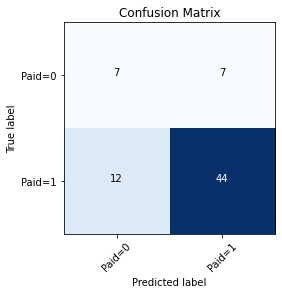

Accuracy: 0.73
Jaccard Score: 0.7
F1-Score: 0.74


		*** Classification Report ***
              precision    recall  f1-score   support

           0       0.37      0.50      0.42        14
           1       0.86      0.79      0.82        56

    accuracy                           0.73        70
   macro avg       0.62      0.64      0.62        70
weighted avg       0.76      0.73      0.74        70



In [39]:
# Train, Score, Evaluate
# max_depth = dt_gs.best_params_['max_depth']
# criterion = dt_gs.best_params_['criterion']
# splitter = dt_gs.best_params_['splitter']
max_depth = 11
criterion = "entropy"
splitter = 'best'
dt_clf = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, splitter = splitter).fit(X_train, y_train)
yhat = dt_clf.predict(X_test)

# Evaluation
dt_accuracy = accuracy_score(y_test, yhat)
dt_j_score = jaccard_score(y_test, yhat)
dt_clf_report = classification_report(y_test, yhat, output_dict = True)
cmatrix = confusion_matrix(y_test, yhat, labels = [0, 1])

# Visualization
cmatrix_viz(cmatrix, title = 'Confusion Matrix', classes = ['Paid=0', 'Paid=1'])
plt.show()

print('Accuracy: {:.2}'.format(dt_accuracy))
print('Jaccard Score: {:.2}'.format(dt_j_score))
print('F1-Score: {:.2}'.format(dt_clf_report['weighted avg']['f1-score']))
print()
print('\n\t\t*** Classification Report ***')
print(classification_report(y_test, yhat))

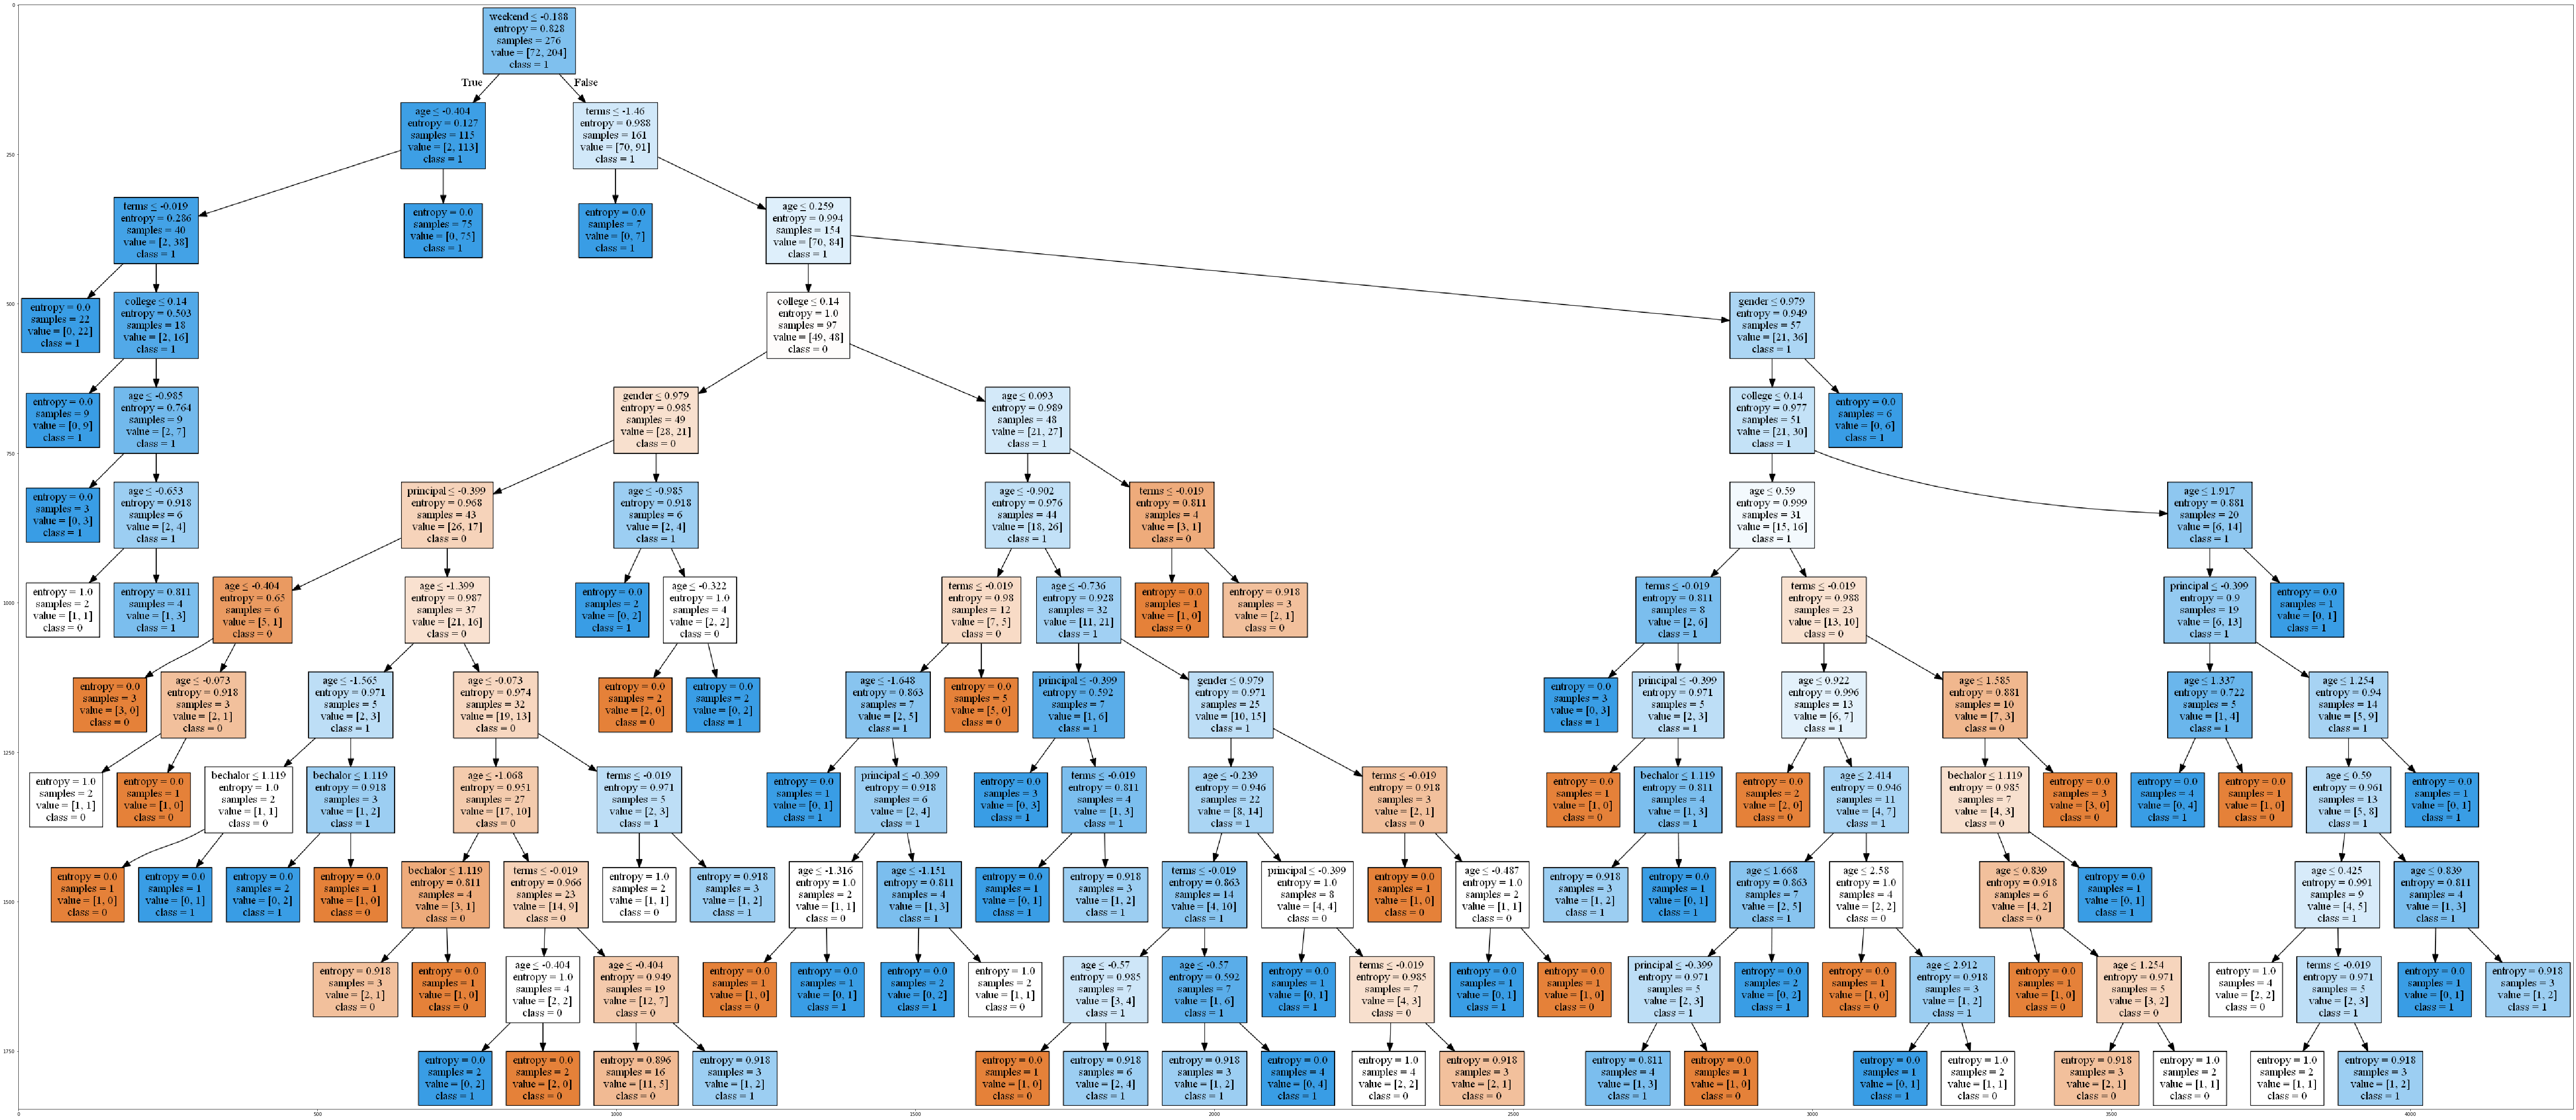

In [40]:
visualize_tree(dt_clf)

# Support Vector Machine


In [41]:
from sklearn import svm

In [42]:
params = [
    {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
    }
]

svm_gs = GridSearchCV(svm.SVC(), param_grid = params, scoring = 'jaccard', cv = 50).fit(X_train, y_train)
svm_gs.best_params_

{'C': 0.25, 'kernel': 'poly'}

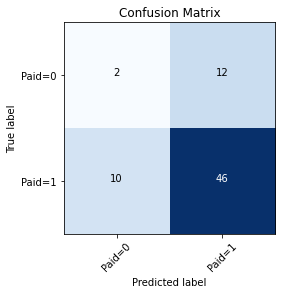

Accuracy: 0.69
Jaccard Score: 0.68
F1-Score: 0.68


		*** Classification Report ***
              precision    recall  f1-score   support

           0       0.17      0.14      0.15        14
           1       0.79      0.82      0.81        56

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.67      0.69      0.68        70



In [43]:
# Train, Score, Evaluate
# C = svm_gs.best_params_['C']
# kernel = svm_gs.best_params_['kernel']
# svm_clf = svm.SVC(kernel = kernel, C = C).fit(X_train, y_train)
svm_clf = svm.SVC().fit(X_train, y_train)
yhat = svm_clf.predict(X_test)

# Evaluation
svm_accuracy = accuracy_score(y_test, yhat)
svm_j_score = jaccard_score(y_test, yhat)
svm_clf_report = classification_report(y_test, yhat, output_dict = True)
cmatrix = confusion_matrix(y_test, yhat, labels = [0, 1])

# Visualization
cmatrix_viz(cmatrix, title = 'Confusion Matrix', classes = ['Paid=0', 'Paid=1'])
plt.show()

print('Accuracy: {:.2}'.format(svm_accuracy))
print('Jaccard Score: {:.2}'.format(svm_j_score))
print('F1-Score: {:.2}'.format(svm_clf_report['weighted avg']['f1-score']))
print()
print('\n\t\t*** Classification Report ***')
print(classification_report(y_test, yhat))

# Logistic Regression


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
params = [
    {
        'C': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
]

logreg_gs = GridSearchCV(LogisticRegression(), param_grid = params, scoring = 'jaccard', cv = 50).fit(X_train, y_train)
logreg_gs.best_params_

{'C': 0.01, 'solver': 'newton-cg'}

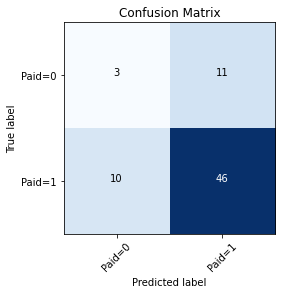

Accuracy: 0.7
Jaccard Score: 0.69
F1-Score: 0.7
Log Loss: 0.5145134781155213


		*** Classification Report ***
              precision    recall  f1-score   support

           0       0.23      0.21      0.22        14
           1       0.81      0.82      0.81        56

    accuracy                           0.70        70
   macro avg       0.52      0.52      0.52        70
weighted avg       0.69      0.70      0.70        70



In [46]:
# Train, Score, Evaluate
# C = logreg_gs.best_params_['C']
# solver = logreg_gs.best_params_['solver']
# logreg_clf = LogisticRegression(C = C, solver = solver).fit(X_train, y_train)
logreg_clf = LogisticRegression().fit(X_train, y_train)
yhat = logreg_clf.predict(X_test)

# Evaluation
log_accuracy = accuracy_score(y_test, yhat)
log_j_score = jaccard_score(y_test, yhat)
log_clf_report = classification_report(y_test, yhat, output_dict = True)
clf_log_loss = log_loss(y_test, logreg_clf.predict_proba(X_test))
cmatrix = confusion_matrix(y_test, yhat, labels = [0, 1])

# Visualization
cmatrix_viz(cmatrix, title = 'Confusion Matrix', classes = ['Paid=0', 'Paid=1'])
plt.show()

print('Accuracy: {:.2}'.format(log_accuracy))
print('Jaccard Score: {:.2}'.format(log_j_score))
print('F1-Score: {:.2}'.format(log_clf_report['weighted avg']['f1-score']))
print('Log Loss: {}'.format(clf_log_loss))
print()
print('\n\t\t*** Classification Report ***')
print(classification_report(y_test, yhat))

# Model Evaluation using Test set


In [47]:
# from sklearn.metrics import jaccard_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import log_loss

First, download and load the test set:


In [48]:
# !wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

In [49]:
file = 'loan_test.csv'
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'

if os.path.isfile(file):
    print('File {} exists'.format(file))
    print('Go on further')
else:
    try:
        import wget
        print('wget has been imported')
    except Exception as e:
        print('Installing wget for Python 3...')
        os.system('pip install python3-wget')
        print('wget has been installed')
        import wget
        print('wget has been imported')
    finally:
        print('Donwloading {}...'.format(file))
        file_tmp = wget.download(url, out = file)
        print('Done')

File loan_test.csv exists
Go on further


### Load Test set for evaluation


In [50]:
# test_df = pd.read_csv('loan_test.csv')
test_df = pd.read_csv('loan_test.csv')
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x > 3)  else 0)
test_df['Gender'].replace(to_replace = ['male','female'], value = [0,1], inplace = True)
test_df['paid'] = test_df['loan_status'].replace(to_replace = ['PAIDOFF', 'COLLECTION'], value = [1, 0])
test_df = pd.concat([test_df, pd.get_dummies(test_df['education'])], axis = 1)
test_df.drop(columns = ['education', 'Unnamed: 0', 'Unnamed: 0.1', 'Master or Above', 'effective_date', 'due_date', 'loan_status'], inplace = True)
test_df.columns = ['principal', 'terms', 'age', 'gender', 'dayofweek', 'weekend', 'paid', 'bechalor', 'school', 'college']
X_validate = test_df[features]
X_validate = scaler.transform(X_validate)
y_validate = test_df['paid'].values
print('Validate obs.: {}'.format(len(y_validate)))

Validate obs.: 54


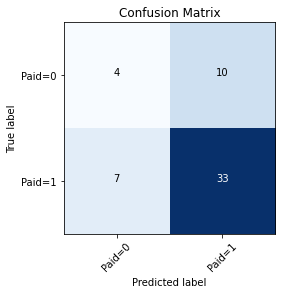

Accuracy: 0.69
Jaccard Score: 0.66
F1-Score: 0.67


		*** Classification Report ***
              precision    recall  f1-score   support

           0       0.36      0.29      0.32        14
           1       0.77      0.82      0.80        40

    accuracy                           0.69        54
   macro avg       0.57      0.56      0.56        54
weighted avg       0.66      0.69      0.67        54



In [51]:
# KNN
yhat = knn_clf.predict(X_validate)

# Evaluation
knn_accuracy = accuracy_score(y_validate, yhat)
knn_j_score = jaccard_score(y_validate, yhat)
knn_clf_report = classification_report(y_validate, yhat, output_dict = True)
cmatrix = confusion_matrix(y_validate, yhat, labels = [0, 1])

# Visualization
cmatrix_viz(cmatrix, title = 'Confusion Matrix', classes = ['Paid=0', 'Paid=1'])
plt.show()

print('Accuracy: {:.2}'.format(knn_accuracy))
print('Jaccard Score: {:.2}'.format(knn_j_score))
print('F1-Score: {:.2}'.format(knn_clf_report['weighted avg']['f1-score']))
print()
print('\n\t\t*** Classification Report ***')
print(classification_report(y_validate, yhat))

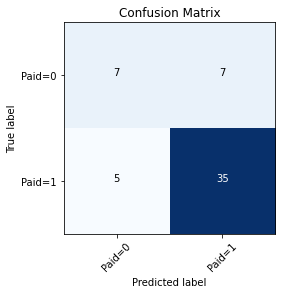

Accuracy: 0.78
Jaccard Score: 0.74
F1-Score: 0.77


		*** Classification Report ***
              precision    recall  f1-score   support

           0       0.58      0.50      0.54        14
           1       0.83      0.88      0.85        40

    accuracy                           0.78        54
   macro avg       0.71      0.69      0.70        54
weighted avg       0.77      0.78      0.77        54



In [52]:
# DT
yhat = dt_clf.predict(X_validate)

# Evaluation
dt_accuracy = accuracy_score(y_validate, yhat)
dt_j_score = jaccard_score(y_validate, yhat)
dt_clf_report = classification_report(y_validate, yhat, output_dict = True)
cmatrix = confusion_matrix(y_validate, yhat, labels = [0, 1])

# Visualization
cmatrix_viz(cmatrix, title = 'Confusion Matrix', classes = ['Paid=0', 'Paid=1'])
plt.show()

print('Accuracy: {:.2}'.format(dt_accuracy))
print('Jaccard Score: {:.2}'.format(dt_j_score))
print('F1-Score: {:.2}'.format(dt_clf_report['weighted avg']['f1-score']))
print()
print('\n\t\t*** Classification Report ***')
print(classification_report(y_validate, yhat))

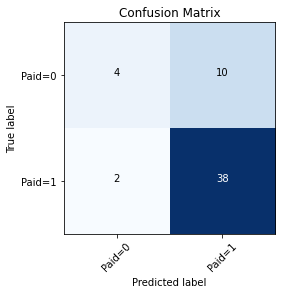

Accuracy: 0.78
Jaccard Score: 0.76
F1-Score: 0.74


		*** Classification Report ***
              precision    recall  f1-score   support

           0       0.67      0.29      0.40        14
           1       0.79      0.95      0.86        40

    accuracy                           0.78        54
   macro avg       0.73      0.62      0.63        54
weighted avg       0.76      0.78      0.74        54



In [53]:
# SVM
yhat = svm_clf.predict(X_validate)

# Evaluation
svm_accuracy = accuracy_score(y_validate, yhat)
svm_j_score = jaccard_score(y_validate, yhat)
svm_clf_report = classification_report(y_validate, yhat, output_dict = True)
cmatrix = confusion_matrix(y_validate, yhat, labels = [0, 1])

# Visualization
cmatrix_viz(cmatrix, title = 'Confusion Matrix', classes = ['Paid=0', 'Paid=1'])
plt.show()

print('Accuracy: {:.2}'.format(svm_accuracy))
print('Jaccard Score: {:.2}'.format(svm_j_score))
print('F1-Score: {:.2}'.format(svm_clf_report['weighted avg']['f1-score']))
print()
print('\n\t\t*** Classification Report ***')
print(classification_report(y_validate, yhat))

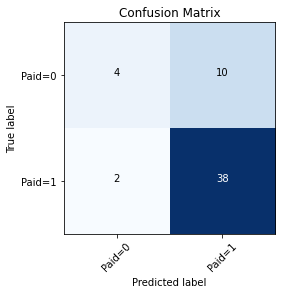

Accuracy: 0.78
Jaccard Score: 0.76
F1-Score: 0.74
Log Loss: 0.47327961252592976


		*** Classification Report ***
              precision    recall  f1-score   support

           0       0.67      0.29      0.40        14
           1       0.79      0.95      0.86        40

    accuracy                           0.78        54
   macro avg       0.73      0.62      0.63        54
weighted avg       0.76      0.78      0.74        54



In [54]:
# Log Reg
yhat = logreg_clf.predict(X_validate)

# Evaluation
log_accuracy = accuracy_score(y_validate, yhat)
log_j_score = jaccard_score(y_validate, yhat)
log_clf_report = classification_report(y_validate, yhat, output_dict = True)
clf_log_loss = log_loss(y_validate, logreg_clf.predict_proba(X_validate))
cmatrix = confusion_matrix(y_validate, yhat, labels = [0, 1])

# Visualization
cmatrix_viz(cmatrix, title = 'Confusion Matrix', classes = ['Paid=0', 'Paid=1'])
plt.show()

print('Accuracy: {:.2}'.format(log_accuracy))
print('Jaccard Score: {:.2}'.format(log_j_score))
print('F1-Score: {:.2}'.format(log_clf_report['weighted avg']['f1-score']))
print('Log Loss: {}'.format(clf_log_loss))
print()
print('\n\t\t*** Classification Report ***')
print(classification_report(y_validate, yhat))

In [55]:
df_evaluation = pd.DataFrame()
df_evaluation = df_evaluation.append(
    [
        {'Algorithm': 'KNN', 'Jaccard': knn_j_score, 'F1-score': knn_clf_report['weighted avg']['f1-score']},
        {'Algorithm': 'Decision Tree', 'Jaccard': dt_j_score, 'F1-score': dt_clf_report['weighted avg']['f1-score']},
        {'Algorithm': 'SVM', 'Jaccard': svm_j_score, 'F1-score': svm_clf_report['weighted avg']['f1-score']},
        {'Algorithm': 'LogisticRegression', 'Jaccard': log_j_score, 'F1-score': log_clf_report['weighted avg']['f1-score'], 'LogLoss': clf_log_loss}
    ], ignore_index = True
)

df_evaluation

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.660000,0.671986,NaN
1,Decision Tree,0.744681,0.771941,NaN
2,SVM,0.760000,0.743434,NaN
3,LogisticRegression,0.760000,0.743434,0.47328


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
